In [19]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv('C:/Users/SRISTI/Data file.csv')
data.head(20)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0            1      0  21408I70789   272.0   3055.050000   3065.150000   
1            2      1  76462I70374   712.0  12122.000000  12124.750000   
2            3      1  17943I70372   535.0   1398.000000   1398.000000   
3            4      1  55773I70781   241.0     21.228000     21.228000   
4            5      1  03813I82730   947.0    150.619333    150.619333   
5            6      1  35819I70783   568.0   2257.362667   2261.460000   
6            7      1  96759I84459   545.0   2876.641667   2883.970000   
7            8      1  09832I90846   768.0  12905.000000  17804.150000   
8            9      1  59772I84450  1191.0     90.695000     90.695000   
9           10      1  56331I70783   536.0     29.357333     29.357333   
10          11      1  32893I82732  1511.0     12.896000     12.896000   
11          12      0  82417I90848    82.0     65.166667     65.166667   
12          13      1  11435I89236   154.0    227.041000    227.041000   
13          14      1  66580I97601   887.0     55.909333     55.909333   
14          15      1  63139I70377   707.0   8919.000000  10317.350000   
15          16      0  24075I89239  1037.0     12.000000     12.000000   
16          17      0  82053I85350  1583.0   1000.000000   1000.000000   
17          18      1  37204I84452   929.0     10.688000     10.688000   
18          19      1  44217I90455   832.0     14.400000     14.400000   
19          20      1  19611I90842   450.0     48.935000     48.935000   

    rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0     220.13    260.13                2.0                0.0  ...   
1    3691.26   3691.26               20.0                0.0  ...   
2     900.13    900.13                3.0                0.0  ...   
3     159.42    159.42               41.0                0.0  ...   
4    1098.90   1098.90                4.0                0.0  ...   
5     368.13    380.13                2.0                0.0  ...   
6     335.75    402.90               13.0                0.0  ...   
7     900.35   2549.11                4.0               55.0  ...   
8    2287.50   2287.50                1.0                0.0  ...   
9     612.96    612.96               11.0                0.0  ...   
10    790.44    790.44                8.0                0.0  ...   
11    326.20    326.20               17.0                0.0  ...   
12    240.41    240.41                2.0                0.0  ...   
13    208.80    208.80                2.0                0.0  ...   
14    399.25   2453.78                3.0                0.0  ...   
15   1216.80   1216.80                0.0                0.0  ...   
16   1000.80   1087.88                0.0                0.0  ...   
17     40.00     40.00                0.0                0.0  ...   
18   1660.96   1660.96                1.0                0.0  ...   
19    726.30    726.30                1.0                0.0  ...   

    maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0               6.0                 0.0          2.0            12   
1              12.0                 0.0          1.0            12   
2               6.0                 0.0          1.0             6   
3               6.0                 0.0          2.0            12   
4               6.0                 0.0          7.0            42   
5               6.0                 0.0          3.0            18   
6               6.0                 0.0          1.0             6   
7               6.0                 0.0          7.0            42   
8               6.0                 0.0          4.0            24   
9               6.0                 0.0          1.0             6   
10              6.0                 0.0          2.0            12   
11              6.0                 0.0          1.0             6   
12              6.0                 0.0          4.0            24   
13              6.0

## EDA

In [21]:
data.shape

(209593, 37)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [23]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [24]:
data['label'].unique()

array([0, 1], dtype=int64)

In [25]:
data['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [26]:
ds=data.copy()

In [27]:
ds.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [28]:
ds1=ds.copy()
ds1.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [29]:
ds1=ds1.drop(columns=['msisdn'])
ds1

Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 36 columns]

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

## Univariate analysis

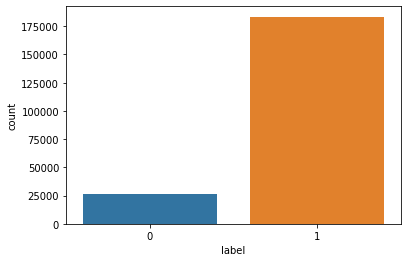

In [31]:
sns.countplot(ds1['label'])

In [32]:
ds1

Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 36 columns]

In [33]:
ds1=ds1.iloc[:,0:-2]
ds1

Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0                 2            12              6.0                 0.0   
1                 1            12             12.0                 0.0   
2                 1             6              6.0                 0.0   
3                 2            12              6.0                 0.0   
4                 7            42              6.0                 0.0   
...             ...           ...              ...                 ...   
209588            2            12              6.0                 0.0   
209589            3            18              6.0                 0.0   
209590            4            42             12.0                 0.0   
209591            2            18             12.0                 0.0   
209592            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0.000000  10.500000  
209592   0.0000

In [34]:
ds1.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

In [35]:
ds1.iloc[:,10:25].describe()

cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
count  209593.000000  209593.000000      209593.000000         209593.000000   
mean        3.978057    3737.355121        7704.501157           1812.817952   
std         4.256090   53643.625172       10139.621714           2070.864620   
min         0.000000       0.000000           0.000000              0.000000   
25%         1.000000       0.000000        1540.000000            770.000000   
50%         3.000000       2.000000        4628.000000           1539.000000   
75%         5.000000       6.000000       10010.000000           1924.000000   
max       203.000000  999606.368132      810096.000000          55000.000000   

       medianmarechprebal30  cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  \
count         209593.000000   209593.00000  209593.000000      209593.000000   
mean            3851.927942        6.31543       7.716780       12396.218352   
std            54006.374433        7.19347      12.590251       16857.793882   
min             -200.000000        0.00000       0.000000           0.000000   
25%               11.000000        2.00000       0.000000        2317.000000   
50%               33.900000        4.00000       2.000000        7226.000000   
75%               83.000000        8.00000       8.000000       16000.000000   
max           999479.419319      336.00000      88.000000      953036.000000   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
count         209593.000000         209593.000000  209593.000000   
mean            1864.595821             92.025541     262.578110   
std             2081.680664            369.215658    4183.897978   
min                0.000000           -200.000000       0.000000   
25%              773.000000             14.600000       0.000000   
50%             1539.000000             36.000000       0.000000   
75%             1924.000000             79.310000       0.000000   
max            55000.000000          41456.500000   99914.441420   

        fr_da_rech30  cnt_da_rech90   fr_da_rech90    cnt_loans30  
count  209593.000000  209593.000000  209593.000000  209593.000000  
mean     3749.494447       0.041495       0.045712       2.758981  
std     53885.414979       0.397556       0.951386       2.554502  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       1.000000  
50%         0.000000       0.000000       0.000000       2.000000  
75%         0.000000       0.000000       0.000000       4.000000  
max    999809.240107      38.000000      64.000000      50.000000

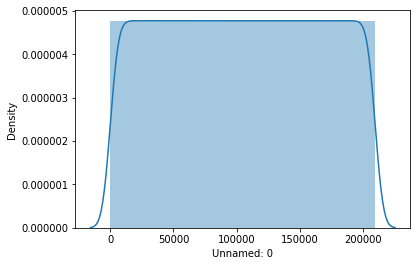

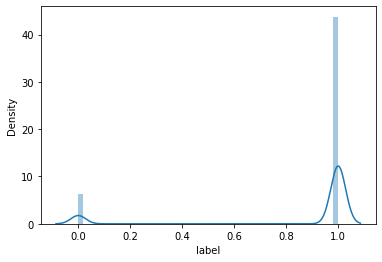

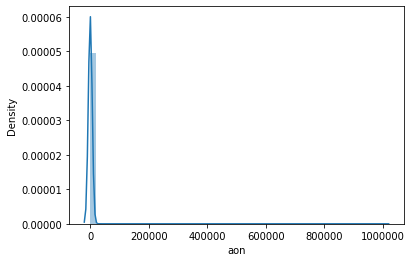

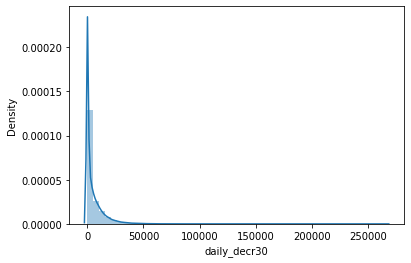

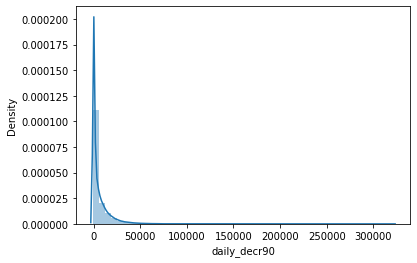

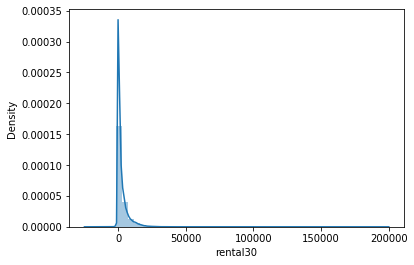

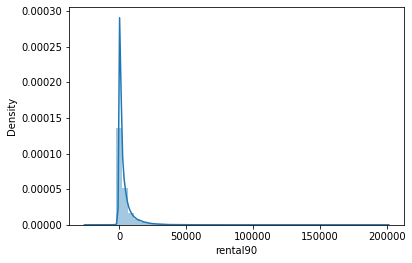

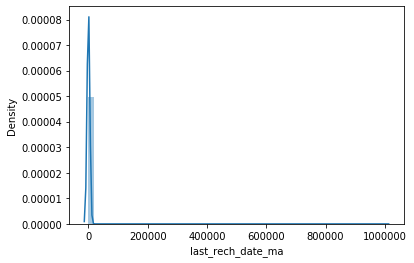

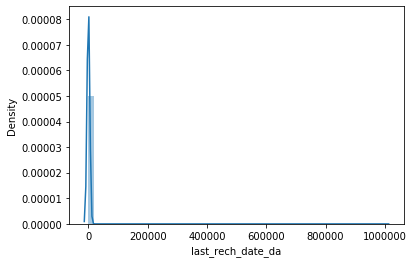

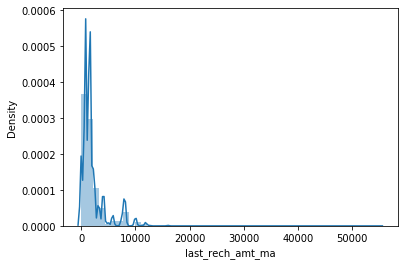

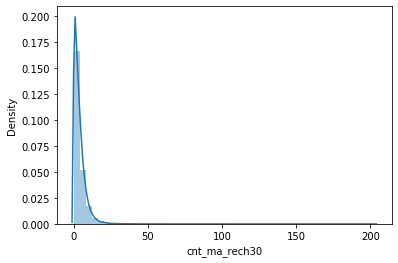

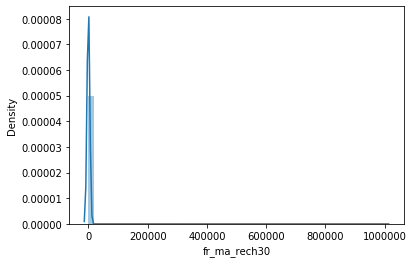

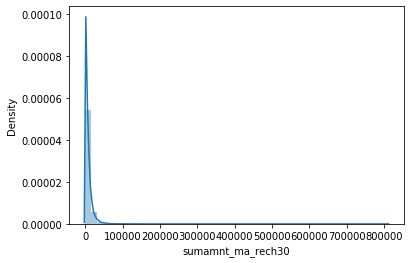

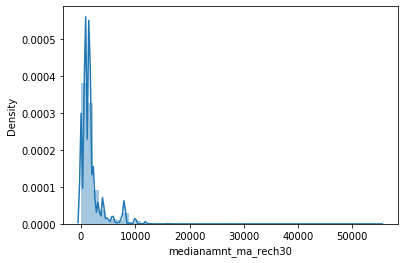

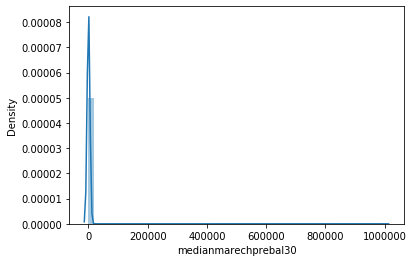

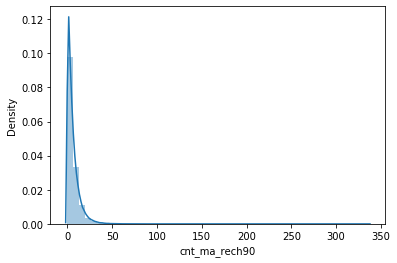

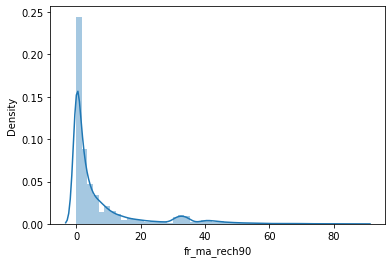

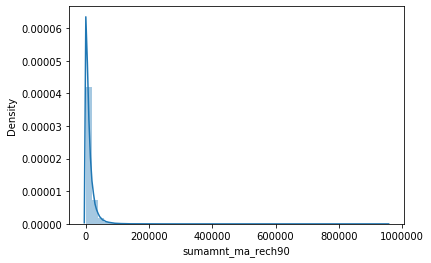

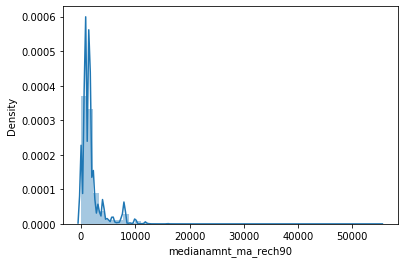

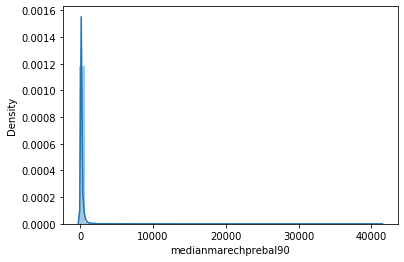

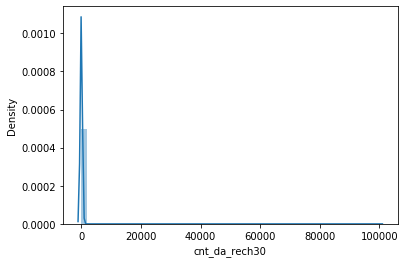

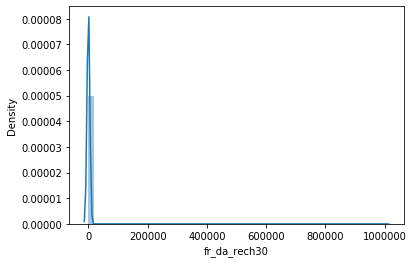

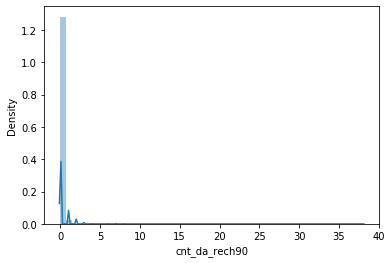

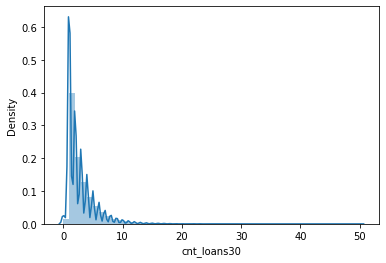

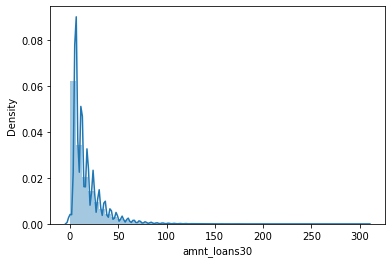

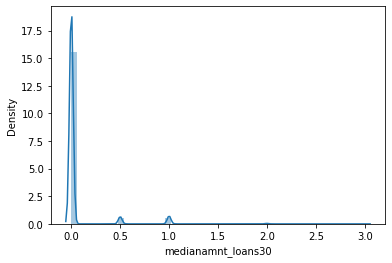

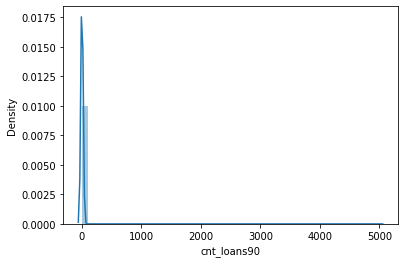

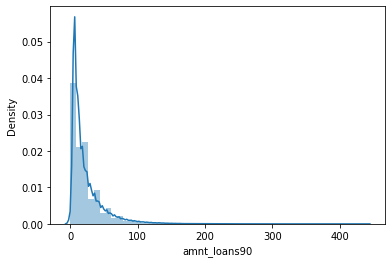

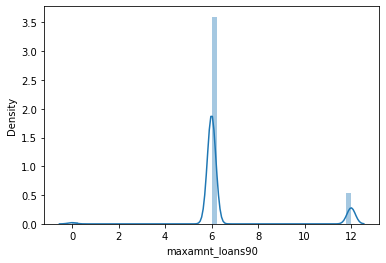

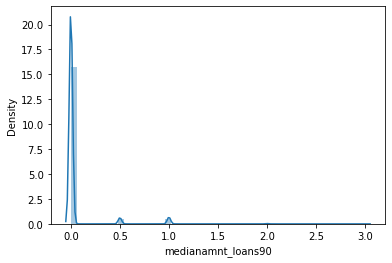

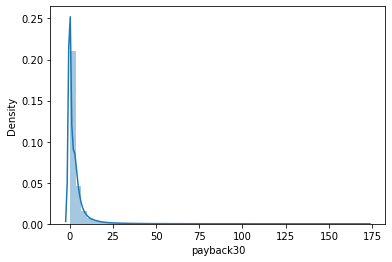

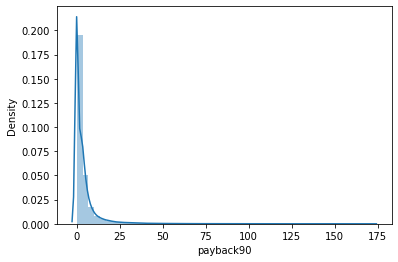

In [36]:
for i in ds1.columns:
    plt.figure()
    sn.distplot(ds1[i])

In [37]:
ds1.skew()

Unnamed: 0              2.854282e-15
label                  -2.270254e+00
aon                     1.039295e+01
daily_decr30            3.946230e+00
daily_decr90            4.252565e+00
rental30                4.521929e+00
rental90                4.437681e+00
last_rech_date_ma       1.479097e+01
last_rech_date_da       1.481486e+01
last_rech_amt_ma        3.781149e+00
cnt_ma_rech30           3.283842e+00
fr_ma_rech30            1.477283e+01
sumamnt_ma_rech30       6.386787e+00
medianamnt_ma_rech30    3.512324e+00
medianmarechprebal30    1.477988e+01
cnt_ma_rech90           3.425254e+00
fr_ma_rech90            2.285423e+00
sumamnt_ma_rech90       4.897950e+00
medianamnt_ma_rech90    3.752706e+00
medianmarechprebal90    4.488050e+01
cnt_da_rech30           1.781836e+01
fr_da_rech30            1.477643e+01
cnt_da_rech90           2.726728e+01
fr_da_rech90            2.898808e+01
cnt_loans30             2.713421e+00
amnt_loans30            2.975719e+00
maxamnt_loans30         1.765805e+01
m

### Multivariate analysis

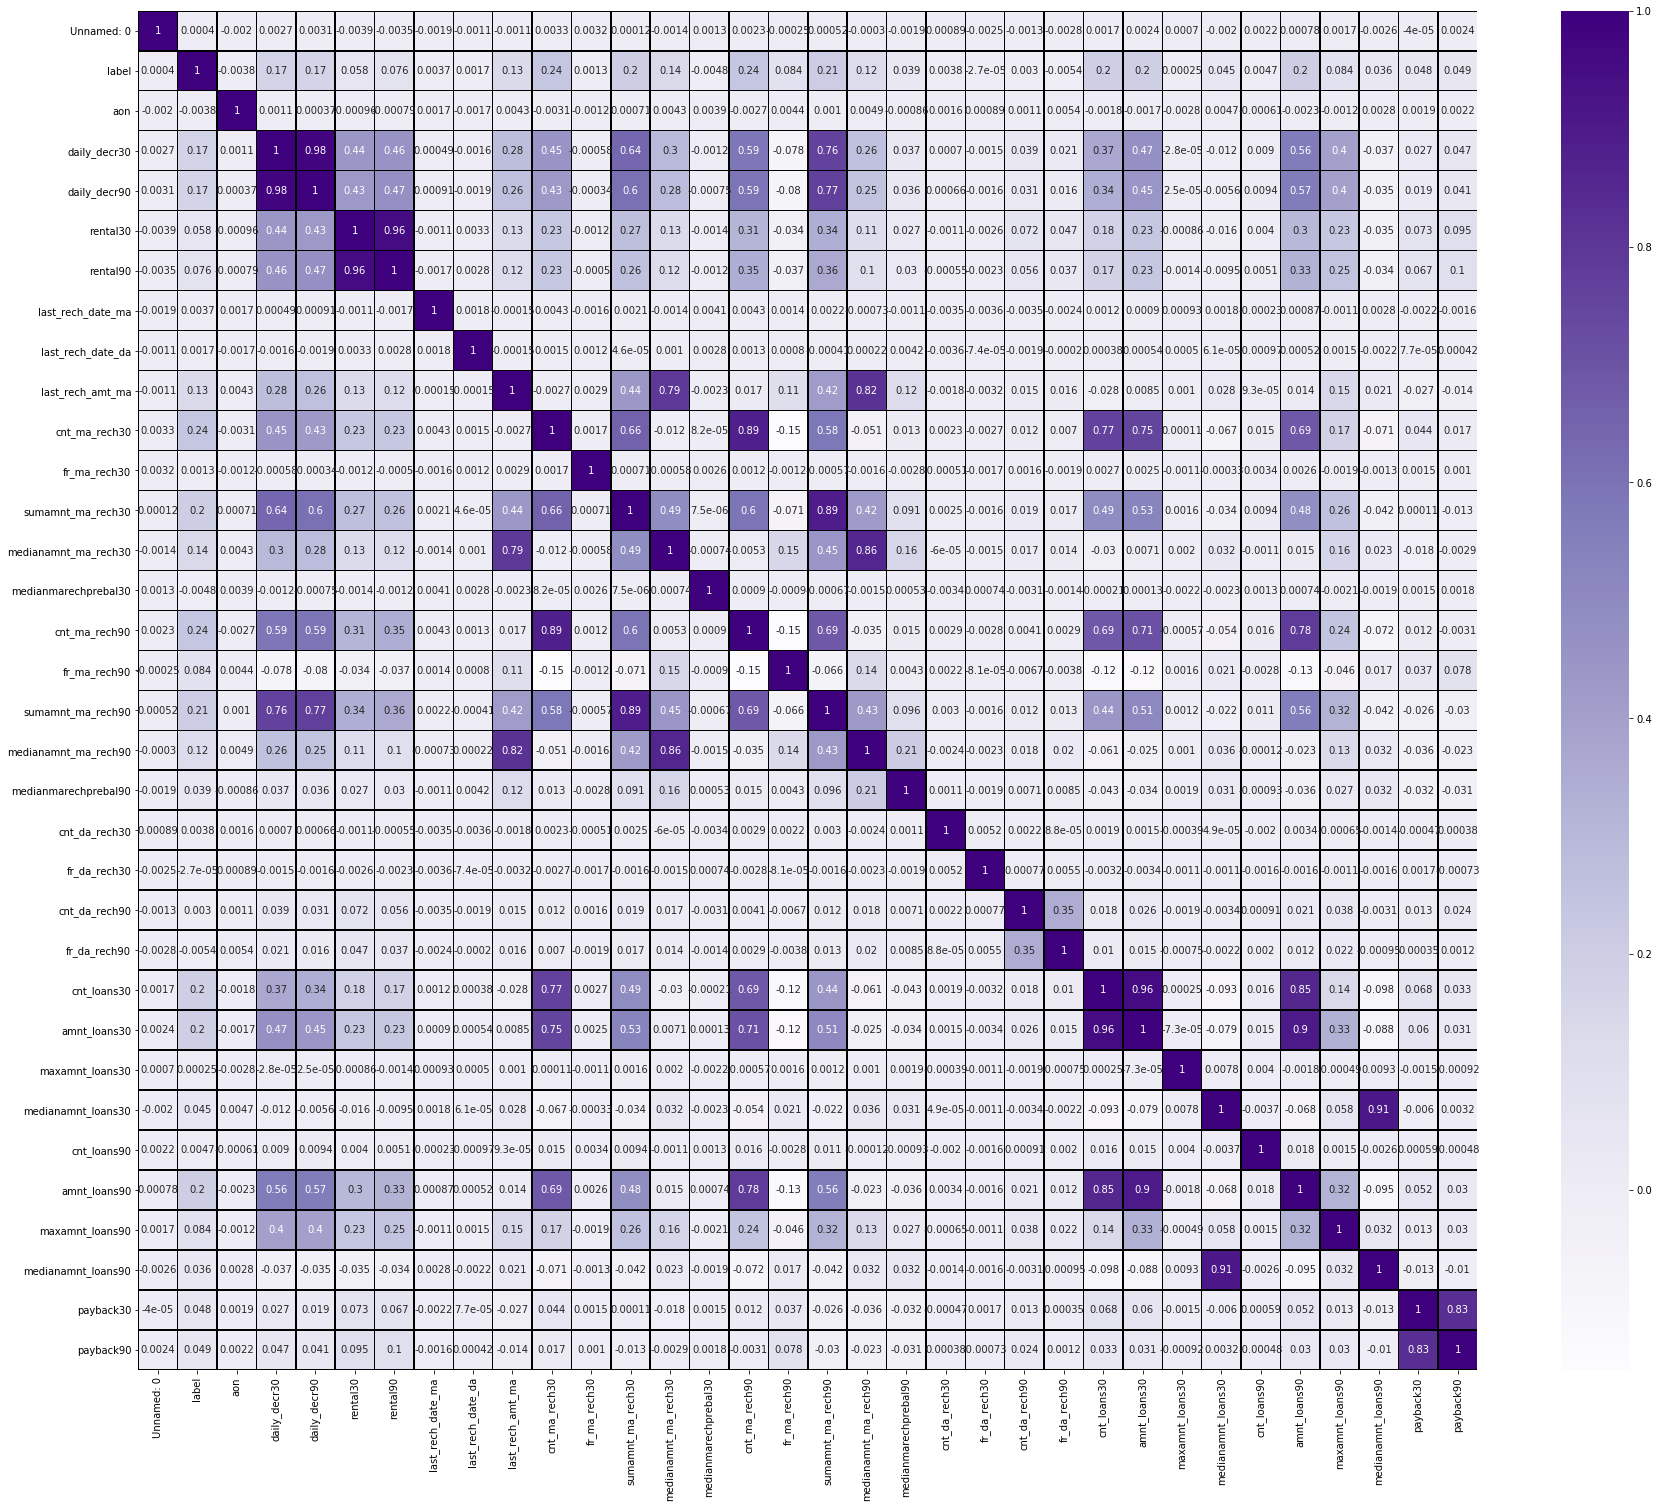

In [38]:
plt.figure(figsize=(30,25))
sn.heatmap(ds1.corr(),annot=True,cmap='Purples',linecolor='Black',linewidth=0.5)

In [39]:
ds1=ds1.drop(columns=['aon'])
ds1

Unnamed: 0  label  daily_decr30  daily_decr90  rental30  rental90  \
0                1      0   3055.050000   3065.150000    220.13    260.13   
1                2      1  12122.000000  12124.750000   3691.26   3691.26   
2                3      1   1398.000000   1398.000000    900.13    900.13   
3                4      1     21.228000     21.228000    159.42    159.42   
4                5      1    150.619333    150.619333   1098.90   1098.90   
...            ...    ...           ...           ...       ...       ...   
209588      209589      1    151.872333    151.872333   1089.19   1089.19   
209589      209590      1     36.936000     36.936000   1728.36   1728.36   
209590      209591      1  11843.111667  11904.350000   5861.83   8893.20   
209591      209592      1  12488.228333  12574.370000    411.83    984.58   
209592      209593      1   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.00

### Checking the outliers

In [40]:
ds1.iloc[:,1:11].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

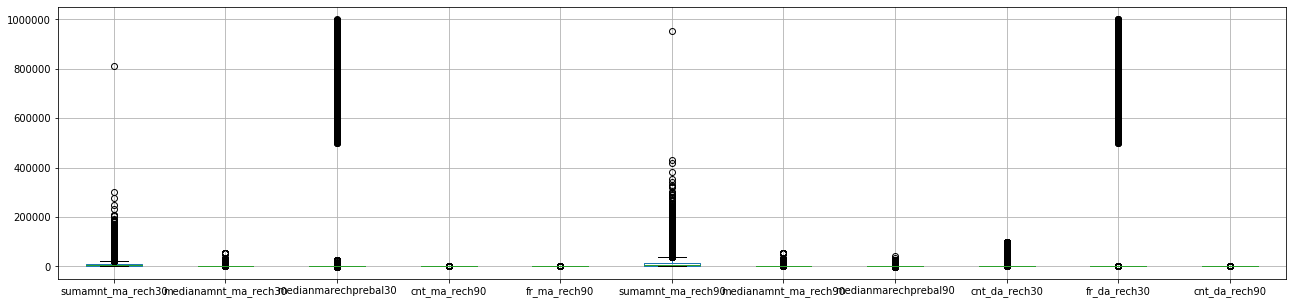

In [41]:
ds1.iloc[:,11:22].boxplot(figsize=[22,6])
plt.subplots_adjust(bottom=.25)
plt.show()

In [42]:
ds1.iloc[:,22:].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

In [43]:
ds2=ds1.iloc[:,2:].copy()
ds2

daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0        3055.050000   3065.150000    220.13    260.13                2.0   
1       12122.000000  12124.750000   3691.26   3691.26               20.0   
2        1398.000000   1398.000000    900.13    900.13                3.0   
3          21.228000     21.228000    159.42    159.42               41.0   
4         150.619333    150.619333   1098.90   1098.90                4.0   
...              ...           ...       ...       ...                ...   
209588    151.872333    151.872333   1089.19   1089.19                1.0   
209589     36.936000     36.936000   1728.36   1728.36                4.0   
209590  11843.111667  11904.350000   5861.83   8893.20                3.0   
209591  12488.228333  12574.370000    411.83    984.58                2.0   
209592   4489.362000   4534.820000    483.92    631.20               13.0   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                     0.0              1539              2          21.0   
1                     0.0              5787              1           0.0   
2                     0.0              1539              1           0.0   
3                     0.0               947              0           0.0   
4                     0.0              2309              7           2.0   
...                   ...               ...            ...           ...   
209588                0.0              4048              3           2.0   
209589                0.0               773              4           1.0   
209590                0.0              1539              5           8.0   
209591               38.0               773              5           4.0   
209592                0.0              7526              2           1.0   

        sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0                  3078.0  ...            2            12              6.0   
1                  5787.0  ...            1            12             12.0   
2                  1539.0  ...            1             6              6.0   
3                     0.0  ...            2            12              6.0   
4                 20029.0  ...            7            42              6.0   
...                   ...  ...          ...           ...              ...   
209588            10404.0  ...            2            12              6.0   
209589             3092.0  ...            3            18              6.0   
209590             9334.0  ...            4            42             12.0   
209591            12154.0  ...            2            18             12.0   
209592             9065.0  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  29.000000  29.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
...                    ...        ... 

### Capping the outliers using IQR

In [44]:
def iqr_cap(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        up_wsk=q3+(factor*iqr)
        lw_wsk=q1-(factor*iqr)
        df[col]=np.where(df[col]>up_wsk, up_wsk, np.where(df[col]<lw_wsk, lw_wsk, df[col]))

In [45]:
iqr_cap(ds2,ds2.columns,1.5)

In [46]:
ds2.iloc[:,0:11].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

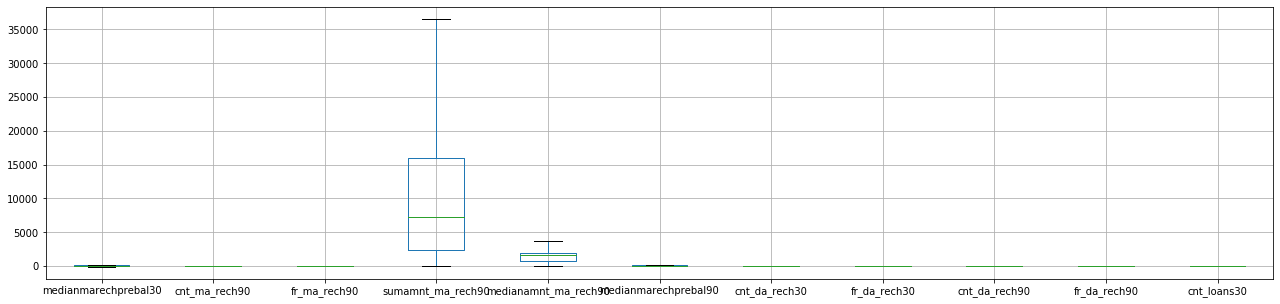

In [47]:
ds2.iloc[:,11:22].boxplot(figsize=[22,6])
plt.subplots_adjust(bottom=.25)
plt.show()

In [48]:
ds2.iloc[:,22:].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

In [49]:
# removing the skewness
from sklearn.preprocessing import PowerTransformer

In [50]:
ds1_sw=ds2.copy()
ds1_sw

daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0        3055.050000   3065.150000    220.13    260.13                2.0   
1       12122.000000  12124.750000   3691.26   3691.26               16.0   
2        1398.000000   1398.000000    900.13    900.13                3.0   
3          21.228000     21.228000    159.42    159.42               16.0   
4         150.619333    150.619333   1098.90   1098.90                4.0   
...              ...           ...       ...       ...                ...   
209588    151.872333    151.872333   1089.19   1089.19                1.0   
209589     36.936000     36.936000   1728.36   1728.36                4.0   
209590  11843.111667  11904.350000   5861.83   8893.20                3.0   
209591  12488.228333  12574.370000    411.83    984.58                2.0   
209592   4489.362000   4534.820000    483.92    631.20               13.0   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                     0.0            1539.0            2.0          15.0   
1                     0.0            4617.5            1.0           0.0   
2                     0.0            1539.0            1.0           0.0   
3                     0.0             947.0            0.0           0.0   
4                     0.0            2309.0            7.0           2.0   
...                   ...               ...            ...           ...   
209588                0.0            4048.0            3.0           2.0   
209589                0.0             773.0            4.0           1.0   
209590                0.0            1539.0            5.0           8.0   
209591                0.0             773.0            5.0           4.0   
209592                0.0            4617.5            2.0           1.0   

        sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0                  3078.0  ...          2.0          12.0              6.0   
1                  5787.0  ...          1.0          12.0              6.0   
2                  1539.0  ...          1.0           6.0              6.0   
3                     0.0  ...          2.0          12.0              6.0   
4                 20029.0  ...          7.0          42.0              6.0   
...                   ...  ...          ...           ...              ...   
209588            10404.0  ...          2.0          12.0              6.0   
209589             3092.0  ...          3.0          18.0              6.0   
209590             9334.0  ...          4.0          42.0              6.0   
209591            12154.0  ...          2.0          18.0              6.0   
209592             9065.0  ...          2.0          18.0              6.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0          12.0              6.0   
1                      0.0          1.0          12.0              6.0   
2                      0.0          1.0           6.0              6.0   
3                      0.0          2.0          12.0              6.0   
4                      0.0          7.0          42.0              6.0   
...                    ...          ...           ...              ...   
209588                 0.0          2.0          12.0              6.0   
209589                 0.0          3.0          18.0              6.0   
209590                 0.0          6.0          54.0              6.0   
209591                 0.0          3.0          24.0              6.0   
209592                 0.0          2.0          18.0              6.0   

        medianamnt_loans90  payback30  payback90  
0                      0.0   9.375000  11.250000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
...                    ...        ... 

In [51]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)

for i in ds1_sw.columns:
    ds1_sw[i]=pt.fit_transform(ds1_sw[i].values.reshape(-1,1))

In [52]:
ds1_sw.skew()

daily_decr30           -5.145302
daily_decr90           -5.361851
rental30                0.133157
rental90                0.083529
last_rech_date_ma      -0.125348
last_rech_date_da       0.000000
last_rech_amt_ma       -0.336663
cnt_ma_rech30          -0.033368
fr_ma_rech30            0.118452
sumamnt_ma_rech30      -0.452785
medianamnt_ma_rech30   -0.555924
medianmarechprebal30    0.054210
cnt_ma_rech90          -0.040754
fr_ma_rech90            0.091461
sumamnt_ma_rech90      -0.356097
medianamnt_ma_rech90   -0.430848
medianmarechprebal90    0.179317
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.044046
amnt_loans30            0.005370
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             0.092294
amnt_loans90           -0.000218
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30               0.249406
payback90 

In [53]:
dsc=ds1_sw

In [54]:
dsc.head(10)

daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0      0.367566      0.338483 -0.740999 -0.737747          -0.477820   
1      1.219776      1.159674  0.633961  0.360344           1.931827   
2      0.003800     -0.015849 -0.430601 -0.501211          -0.249233   
3     -1.061698     -1.057497 -0.772499 -0.780028           1.931827   
4     -0.705185     -0.707053 -0.347145 -0.433414          -0.037768   
5      0.217928      0.192724 -0.668297 -0.690130          -0.477820   
6      0.336865      0.308361 -0.683821 -0.681339           1.498279   
7      1.266198      1.445639 -0.430508  0.025128          -0.037768   
8     -0.816354     -0.816058  0.120811 -0.054230          -0.731677   
9     -1.015201     -1.011634 -0.555607 -0.602908           1.193247   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                0.0          0.119205      -0.316955      1.567144   
1                0.0          1.664764      -0.836948     -1.125983   
2                0.0          0.119205      -0.836948     -1.125983   
3                0.0         -0.349345      -1.655740     -1.125983   
4                0.0          0.600459       1.079957      0.156274   
5                0.0          0.119205       0.384881      1.298190   
6                0.0          1.664764      -0.836948     -1.125983   
7                0.0          1.048705       0.071666      0.440319   
8                0.0          0.119205       0.384881     -0.278502   
9                0.0         -0.515964      -0.836948     -1.125983   

   sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          -0.204070  ...     0.001617     -0.114109              0.0   
1           0.234919  ...    -0.921755     -0.114109              0.0   
2          -0.588134  ...    -0.921755     -0.923232              0.0   
3          -1.903453  ...     0.001617     -0.114109              0.0   
4           1.432330  ...     1.643691      1.596097              0.0   
5           0.283238  ...     0.561036      0.406807              0.0   
6           0.234919  ...    -0.921755     -0.923232              0.0   
7           0.737511  ...     0.561036      0.406807              0.0   
8           0.284264  ...     0.947362      0.795812              0.0   
9          -0.889026  ...    -0.921755     -0.923232              0.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0    -0.212495     -0.273326              0.0   
1                 0.0    -1.044198     -0.273326              0.0   
2                 0.0    -1.044198     -1.029695              0.0   
3                 0.0    -0.212495     -0.273326              0.0   
4                 0.0     1.260879      1.193769              0.0   
5                 0.0     0.290364      0.191303              0.0   
6                 0.0    -1.044198     -1.029695              0.0   
7                 0.0     1.260879      1.193769              0.0   
8                 0.0     0.637115      0.527762              0.0   
9                 0.0    -1.044198     -1.029695              0.0   

   medianamnt_loans90  payback30  payback90  
0                 0.0   1.510284   1.518911  
1                 0.0  -0.943595  -1.025751  
2                 0.0  -0.943595  -1.025751  
3                 0.0  -0.943595  -1.025751  
4                 0.0   0.654560   0.428191  
5                 0.0   1.510284   1.323994  
6                 0.0  -0.943595  -1.025751  
7                 0.0   1.265045   0.787376  
8                 0.0   0.745747   0.522894  
9                 0.0  -0.943595  -1.025751  

[10 rows x 31 columns]

In [55]:
# Spliting the data into train and test

In [56]:
y=ds1.iloc[:,1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [57]:
y.tail(10)

209583    1
209584    0
209585    1
209586    1
209587    1
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, dtype: int64

In [58]:
x=dsc

In [59]:
x.head()

daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0      0.367566      0.338483 -0.740999 -0.737747          -0.477820   
1      1.219776      1.159674  0.633961  0.360344           1.931827   
2      0.003800     -0.015849 -0.430601 -0.501211          -0.249233   
3     -1.061698     -1.057497 -0.772499 -0.780028           1.931827   
4     -0.705185     -0.707053 -0.347145 -0.433414          -0.037768   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                0.0          0.119205      -0.316955      1.567144   
1                0.0          1.664764      -0.836948     -1.125983   
2                0.0          0.119205      -0.836948     -1.125983   
3                0.0         -0.349345      -1.655740     -1.125983   
4                0.0          0.600459       1.079957      0.156274   

   sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          -0.204070  ...     0.001617     -0.114109              0.0   
1           0.234919  ...    -0.921755     -0.114109              0.0   
2          -0.588134  ...    -0.921755     -0.923232              0.0   
3          -1.903453  ...     0.001617     -0.114109              0.0   
4           1.432330  ...     1.643691      1.596097              0.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0    -0.212495     -0.273326              0.0   
1                 0.0    -1.044198     -0.273326              0.0   
2                 0.0    -1.044198     -1.029695              0.0   
3                 0.0    -0.212495     -0.273326              0.0   
4                 0.0     1.260879      1.193769              0.0   

   medianamnt_loans90  payback30  payback90  
0                 0.0   1.510284   1.518911  
1                 0.0  -0.943595  -1.025751  
2                 0.0  -0.943595  -1.025751  
3                 0.0  -0.943595  -1.025751  
4                 0.0   0.654560   0.428191  

[5 rows x 31 columns]

### Handling the class imbalance problem by oversampling the minority class

In [60]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [61]:
x_over,y_over=sm.fit_resample(x,y)

In [62]:
y_over.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [63]:
x=x_over
y=y_over

### Finding the best random state

In [73]:
maxacc=0
maxrs=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.894489511099481  at random state 45


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=45)

In [75]:
x_train.shape

(275146, 31)

In [76]:
x_test.shape

(91716, 31)

In [77]:
y_train.shape

(275146,)

In [78]:
y_test.shape

(91716,)

## Model training 

In [79]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [80]:
model=[lg,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    cvscore=cross_val_score(m,x,y,cv=5)
    print(cvscore.mean())
    print('\n')

accuracy score: LogisticRegression()
accuracy_score 0.771239478389812
confusion_matrix [[36054  9910]
 [11071 34681]]
classification_report               precision    recall  f1-score   support

           0       0.77      0.78      0.77     45964
           1       0.78      0.76      0.77     45752

    accuracy                           0.77     91716
   macro avg       0.77      0.77      0.77     91716
weighted avg       0.77      0.77      0.77     91716

0.7697553868470381


accuracy score: DecisionTreeClassifier()
accuracy_score 0.8938898338348816
confusion_matrix [[41581  4383]
 [ 5349 40403]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.90      0.90     45964
           1       0.90      0.88      0.89     45752

    accuracy                           0.89     91716
   macro avg       0.89      0.89      0.89     91716
weighted avg       0.89      0.89      0.89     91716

0.8890973877593492




In [81]:
model=[gnb,rfc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    cvscore=cross_val_score(m,x,y,cv=5)
    print(cvscore.mean())
    print('\n')

accuracy score: GaussianNB()
accuracy_score 0.7561276113219068
confusion_matrix [[35702 10262]
 [12105 33647]]
classification_report               precision    recall  f1-score   support

           0       0.75      0.78      0.76     45964
           1       0.77      0.74      0.75     45752

    accuracy                           0.76     91716
   macro avg       0.76      0.76      0.76     91716
weighted avg       0.76      0.76      0.76     91716

0.7541800471252531


accuracy score: RandomForestClassifier()
accuracy_score 0.9402394347769201
confusion_matrix [[43310  2654]
 [ 2827 42925]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.94      0.94     45964
           1       0.94      0.94      0.94     45752

    accuracy                           0.94     91716
   macro avg       0.94      0.94      0.94     91716
weighted avg       0.94      0.94      0.94     91716

0.9385547005655305




In [82]:
from sklearn.tree import ExtraTreeClassifier


etc=ExtraTreeClassifier()


etc.fit(x_train,y_train)
pred=etc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))
cvscore=cross_val_score(etc,x,y,cv=5)
print(cvscore.mean())

accuracy_score 0.8768589995202581
confusion_matrix [[41155  4809]
 [ 6485 39267]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.90      0.88     45964
           1       0.89      0.86      0.87     45752

    accuracy                           0.88     91716
   macro avg       0.88      0.88      0.88     91716
weighted avg       0.88      0.88      0.88     91716

0.8769265104734499


### Hyper Paramater Tunning using Grid SearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [87]:
# For DTC

parameter={'max_depth':np.arange(9,21),'criterion':['gini','entropy']}

gcv=GridSearchCV(dtc,parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])})

In [88]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [89]:
gcv.best_score_

0.8831456749580244

In [90]:
# For ETC

parameter={'max_depth':np.arange(35,60),'criterion':['gini','entropy']}

gcv=GridSearchCV(etc,parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [91]:
gcv.best_score_

0.865744002484184

In [92]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 50}

### Train the model again

In [95]:
# for decision tree classifier

dtc=DecisionTreeClassifier(criterion='entropy')

In [96]:
dtc.fit(x_train,y_train)
preddt=dtc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddt))
print('confusion_matrix',confusion_matrix(y_test,preddt))
print('classification_report',classification_report(y_test,preddt))

accuracy_score 0.8971171878407257
confusion_matrix [[41641  4323]
 [ 5113 40639]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.91      0.90     45964
           1       0.90      0.89      0.90     45752

    accuracy                           0.90     91716
   macro avg       0.90      0.90      0.90     91716
weighted avg       0.90      0.90      0.90     91716



In [97]:
# random forest classifier
rfc=RandomForestClassifier(criterion='gini')

In [98]:
rfc.fit(x_train,y_train)
predrf=rfc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('classification_report',classification_report(y_test,predrf))

accuracy_score 0.9399777574250948
confusion_matrix [[43310  2654]
 [ 2851 42901]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.94      0.94     45964
           1       0.94      0.94      0.94     45752

    accuracy                           0.94     91716
   macro avg       0.94      0.94      0.94     91716
weighted avg       0.94      0.94      0.94     91716



In [99]:
# extra tree classifier
etc.fit(x_train,y_train)
predet=etc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predet))
print('confusion_matrix',confusion_matrix(y_test,predet))
print('classification_report',classification_report(y_test,predet))

accuracy_score 0.871014871996162
confusion_matrix [[40924  5040]
 [ 6790 38962]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.89      0.87     45964
           1       0.89      0.85      0.87     45752

    accuracy                           0.87     91716
   macro avg       0.87      0.87      0.87     91716
weighted avg       0.87      0.87      0.87     91716



### AUC ROC CURVE AND SCORE

In [100]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [101]:
# for decision tree classifier

pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

In [102]:
fpr

array([0.        , 0.09374728, 0.09376904, 0.09379079, 0.09385606,
       0.09385606, 0.09394309, 0.09400835, 0.09405187, 0.09442172,
       0.09450875, 0.09457401, 0.09485684, 0.09574885, 0.09587938,
       0.09594465, 0.09653207, 0.09690192, 0.09718475, 0.098947  ,
       0.10040466, 0.10044818, 0.10210164, 0.10221043, 0.10229745,
       0.10242799, 0.10253677, 0.10255852, 0.10297189, 0.1031677 ,
       0.10340701, 0.10395092, 0.10862849, 0.10893308, 0.10923766,
       0.1097163 , 0.11049952, 0.11078235, 0.1109564 , 0.11128274,
       0.11167435, 0.11217475, 0.11352363, 0.11439387, 0.11463319,
       0.11515534, 0.11582978, 0.11722217, 0.11759203, 0.11796188,
       0.11828823, 0.11913672, 0.11931076, 0.11965886, 0.1201375 ,
       0.15331564, 0.15344618, 0.15414237, 1.        ])

In [103]:
tpr

array([0.        , 0.88780818, 0.88783004, 0.88789561, 0.88811418,
       0.88813604, 0.88815789, 0.88822347, 0.88824532, 0.88857318,
       0.88859503, 0.88859503, 0.88866061, 0.88890103, 0.88892289,
       0.88892289, 0.88907589, 0.88916332, 0.8892726 , 0.88953488,
       0.8897316 , 0.8897316 , 0.88999388, 0.88999388, 0.88999388,
       0.88999388, 0.89003759, 0.89003759, 0.89005945, 0.89005945,
       0.89008131, 0.89016874, 0.89071516, 0.89073702, 0.89078073,
       0.89080259, 0.89086816, 0.89086816, 0.89086816, 0.89086816,
       0.89086816, 0.89091187, 0.8909993 , 0.89104301, 0.89104301,
       0.89104301, 0.89108673, 0.89110859, 0.89110859, 0.89113044,
       0.89113044, 0.89117416, 0.89117416, 0.89117416, 0.89117416,
       0.89178615, 0.89182987, 0.89182987, 1.        ])

In [104]:
thresholds

array([2.        , 1.        , 0.92307692, 0.83333333, 0.80769231,
       0.75      , 0.71428571, 0.66666667, 0.625     , 0.5       ,
       0.46666667, 0.38461538, 0.33333333, 0.2519685 , 0.25      ,
       0.21428571, 0.20408163, 0.2       , 0.19642857, 0.19202899,
       0.18461538, 0.16666667, 0.15087719, 0.125     , 0.11764706,
       0.11111111, 0.10526316, 0.1       , 0.09090909, 0.08695652,
       0.08333333, 0.07894737, 0.07840617, 0.07692308, 0.07142857,
       0.07017544, 0.06896552, 0.06666667, 0.0625    , 0.05882353,
       0.05555556, 0.05      , 0.04878049, 0.04444444, 0.04166667,
       0.04      , 0.03508772, 0.03381643, 0.03225806, 0.03076923,
       0.02941176, 0.02777778, 0.02272727, 0.02222222, 0.02173913,
       0.02086107, 0.02083333, 0.01724138, 0.        ])

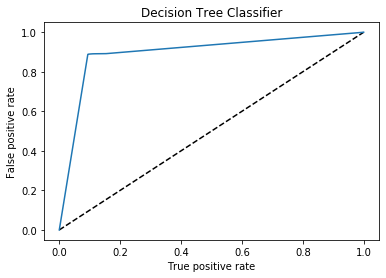

In [105]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [106]:
auc_score=roc_auc_score(y_test,preddt)
auc_score

0.8970967279652888

In [107]:
# for extra tree classifier
pred_prob=etc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

In [108]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Extra tree classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Extra Tree Classifier')
plt.show()

In [109]:
auc_score=roc_auc_score(y_test,predet)
auc_score

0.8709700780143301

In [110]:
# for random forest classifier

pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

In [111]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [113]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.9399724717850528

### Saving the model

In [114]:
import joblib

In [115]:
joblib.dump(rfc,'mcfd_rfc.obj')

['mcfd_rfc.obj']